# Loading Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn


In [3]:
# import dataset

df = pd.read_csv('Dataset/amazonLabelled - amazonLabelled.csv')

In [4]:
df.head()

,S,Feedback,Sentiment
0,1,"Good case, Excellent value.",Positive
1,2,Great for the jawbone.,Positive
2,3,Tied to charger for conversations lasting more...,Negative
3,4,The mic is great.,Positive
4,5,I have to jiggle the plug to get it to line up...,Negative


In [5]:
df.shape

(999, 3)

In [6]:
df.isnull().values.any()

False

In [7]:
df["Sentiment"].value_counts()

Sentiment
Positive    500
Negative    499
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lb=LabelEncoder()

In [10]:
lb.fit(df["Sentiment"])

LabelEncoder()

In [11]:
df["Sentiment"]=lb.transform(df["Sentiment"])

In [12]:
df.head()

,S,Feedback,Sentiment
0,1,"Good case, Excellent value.",1
1,2,Great for the jawbone.,1
2,3,Tied to charger for conversations lasting more...,0
3,4,The mic is great.,1
4,5,I have to jiggle the plug to get it to line up...,0


# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(df.drop("Sentiment",axis=1),df["Sentiment"],test_size=0.2)

In [15]:
X_train.shape

(799, 2)

In [16]:
train_df=pd.concat([X_train,y_train],axis=1).to_csv("Dataset/train_set.csv",index=False)

In [17]:
test_df=pd.concat([X_test,y_test],axis=1).to_csv("Dataset/test_set.csv",index=False)

# Data ingestion step - Training dataset

In [18]:
train_df=pd.read_csv("Dataset/train_set.csv")

In [19]:
X_train,y_train=train_df["Feedback"],train_df["Sentiment"]

In [20]:
X_train

0      First off the reception sucks, I have never ha...
1                                Has been working great.
2                       What a waste of money and time!.
3      The handsfree part works fine, but then the ca...
4                  Terrible product, and waste of money!
                             ...                        
794                                  I love this device.
795    This is the phone to get for 2005.... I just b...
796           I would not recommend this item to anyone.
797    I am going to have to be the first to negative...
798                             Great Hands Free Device.
Name: Feedback, Length: 799, dtype: object

In [21]:
y_train

0      0
1      1
2      0
3      1
4      0
      ..
794    1
795    1
796    0
797    0
798    1
Name: Sentiment, Length: 799, dtype: int64

In [22]:
y_train.value_counts()

Sentiment
0    410
1    389
Name: count, dtype: int64

(array([410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 389.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

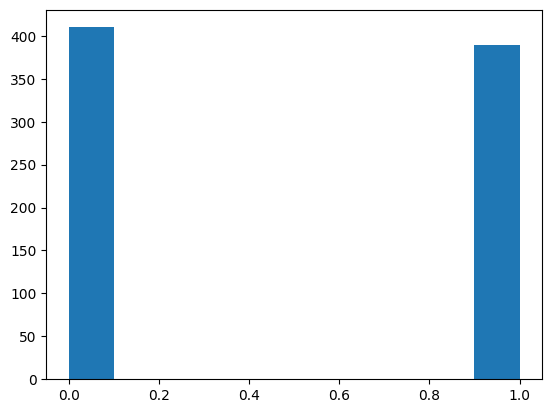

In [23]:
plt.hist(y_train)

# Preprocessing Data

In [24]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import nltk

In [27]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [28]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
lemmatizer=WordNetLemmatizer()

In [29]:
def preprocess_data(data):
    corpus=[]
    for i in data:
        mess=re.sub("[^a-zA-Z0-9]"," ",i)
        mess=mess.lower().split()
        mess=[lemmatizer.lemmatize(word) for word in mess if word not in stopwords.words("english")]
        mess=" ".join(mess)
        corpus.append(mess)
    return corpus    

In [30]:
corpus=preprocess_data(X_train)

In [31]:
len(corpus)

799

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv=CountVectorizer(ngram_range=(1,2))

In [34]:
cv.fit(corpus)

CountVectorizer(ngram_range=(1, 2))

In [35]:
count_train=cv.transform(corpus)

In [36]:
count_train.shape

(799, 4404)

# Model Training

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf=RandomForestClassifier(n_estimators=1200)

In [39]:
rf.fit(count_train,y_train)

RandomForestClassifier(n_estimators=1200)

In [40]:
rf.score(count_train,y_train)

0.9949937421777222

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
scores=cross_val_score(rf,count_train,y_train,cv=3)

In [43]:
scores.mean()

0.7622051383139498

In [44]:
scores.std()

0.006285196502800995

# Hyperparameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid={'n_estimators': [700,1000,1200], 'min_samples_split': [2,4,8,16]}

In [47]:
grid=GridSearchCV(rf,param_grid,n_jobs=-1)

In [48]:
grid.fit(count_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=1200), n_jobs=-1,
             param_grid={'min_samples_split': [2, 4, 8, 16],
                         'n_estimators': [700, 1000, 1200]})

In [49]:
n_est=grid.best_params_["n_estimators"]
min_sam_splt=grid.best_params_["min_samples_split"]


In [50]:
rf=RandomForestClassifier(n_estimators=n_est,min_samples_split=min_sam_splt)

In [51]:
rf.fit(count_train,y_train)

RandomForestClassifier(n_estimators=1200)

# Model Packaging Step

In [52]:
import joblib

In [53]:
joblib.dump(cv,"models/count_vectorizer.pkl")

['models/count_vectorizer.pkl']

In [54]:
joblib.dump(rf,"models/rf_sent_model.pkl")

['models/rf_sent_model.pkl']